In [34]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import tensorflow as tf

In [29]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/dataset .zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/MINE')
zip_ref.close()

In [ ]:
import os
import zipfile
zip_train = zipfile.ZipFile('/content/drive/MyDrive/dataset .zip')
zip_train.extractall('content/drive/MyDrive/MINE')
zip_train.close()

# Data Preprocessing

In [30]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
# Creating training set
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/MINE/dataset /training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# Creating the Test set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/MINE/dataset /test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [39]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [40]:
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [41]:
# Add Flatten layer
cnn.add(tf.keras.layers.Flatten())

# Add Dense layers
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Add output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [45]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
250/250 [==============================] - 59s 215ms/step - loss: 0.6660 - accuracy: 0.5789 - val_loss: 0.6125 - val_accuracy: 0.6640
Epoch 2/10
250/250 [==============================] - 55s 222ms/step - loss: 0.5849 - accuracy: 0.6902 - val_loss: 0.5433 - val_accuracy: 0.7290
Epoch 3/10
250/250 [==============================] - 63s 253ms/step - loss: 0.5529 - accuracy: 0.7160 - val_loss: 0.5096 - val_accuracy: 0.7535
Epoch 4/10
250/250 [==============================] - 67s 268ms/step - loss: 0.5192 - accuracy: 0.7452 - val_loss: 0.5556 - val_accuracy: 0.7360
Epoch 5/10
250/250 [==============================] - 67s 270ms/step - loss: 0.4886 - accuracy: 0.7595 - val_loss: 0.4984 - val_accuracy: 0.7690
Epoch 6/10
250/250 [==============================] - 52s 208ms/step - loss: 0.4718 - accuracy: 0.7766 - val_loss: 0.4929 - val_accuracy: 0.7680
Epoch 7/10
250/250 [==============================] - 59s 236ms/step - loss: 0.4570 - accuracy: 0.7837 - val_loss: 0.5005 - val_ac

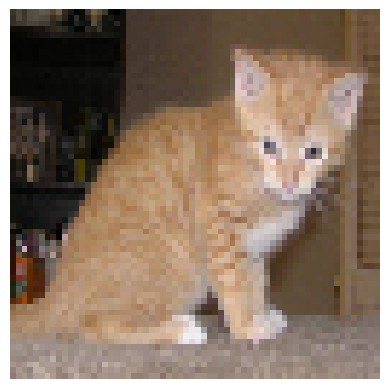

In [51]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

test_image = image.load_img('/content/drive/MyDrive/MINE/dataset /test_set/cats/cat.4003.jpg', target_size=(64, 64))
plt.imshow(test_image)
plt.axis('off')  # Turn off axis labels
plt.show()


In [50]:
#to predict new images
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/MINE/dataset /test_set/cats/cat.4003.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 63ms/step
cat
